###### Importing the libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###### Loading the dataset (CSV file) and displaying it

In [8]:
data = pd.read_csv(r"C:\Users\swarn\OneDrive\Desktop\DA\DA internships\AICTE Oasis Infobytes\EDA on Retail Sales\retail_sales_dataset.csv", encoding = 'latin-1')
#r is used to remove the unicode error due to '\'

In [9]:
df = pd.DataFrame(data)
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount(in hundreds)
0,1,24-11-2023,CUST001,Male,34,Beauty,3,50,1.5
1,2,27-02-2023,CUST002,Female,26,Clothing,2,500,10.0
2,3,13-01-2023,CUST003,Male,50,Electronics,1,30,0.3
3,4,21-05-2023,CUST004,Male,37,Clothing,1,500,5.0
4,5,06-05-2023,CUST005,Male,30,Beauty,2,50,1.0
...,...,...,...,...,...,...,...,...,...
995,996,16-05-2023,CUST996,Male,62,Clothing,1,50,0.5
996,997,17-11-2023,CUST997,Male,52,Beauty,3,30,0.9
997,998,29-10-2023,CUST998,Female,23,Beauty,4,25,1.0
998,999,05-12-2023,CUST999,Female,36,Electronics,3,50,1.5


###### Getting the informations about the dataframe

In [10]:
df.info()
#Information regarding datatype and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transaction ID             1000 non-null   int64  
 1   Date                       1000 non-null   object 
 2   Customer ID                1000 non-null   object 
 3   Gender                     1000 non-null   object 
 4   Age                        1000 non-null   int64  
 5   Product Category           1000 non-null   object 
 6   Quantity                   1000 non-null   int64  
 7   Price per Unit             1000 non-null   int64  
 8   Total Amount(in hundreds)  1000 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 70.4+ KB


In [11]:
df.isnull().sum()
#Counting total null values in the column

Transaction ID               0
Date                         0
Customer ID                  0
Gender                       0
Age                          0
Product Category             0
Quantity                     0
Price per Unit               0
Total Amount(in hundreds)    0
dtype: int64

In [12]:
print("Total Sales : {}".format(df["Quantity"].sum()))
print("Total Profit : {}".format(df["Total Amount(in hundreds)"].sum()))
#Getting the total sales and total profit 

Total Sales : 2514
Total Profit : 4560.0


In [13]:
df.columns
#All the columns of the dataframe

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit',
       'Total Amount(in hundreds)'],
      dtype='object')

In [14]:
df.duplicated().sum()

0

###### Statistical data of the dataframe

In [15]:
df.describe()
#This provides all the statistical information regarding the dataframe in a tabular form

,Transaction ID,Age,Quantity,Price per Unit,Total Amount(in hundreds)
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,4.560000
std,288.819436,13.68143,1.132734,189.681356,5.599976
min,1.000000,18.00000,1.000000,25.000000,0.250000
25%,250.750000,29.00000,1.000000,30.000000,0.600000
50%,500.500000,42.00000,3.000000,50.000000,1.350000
75%,750.250000,53.00000,4.000000,300.000000,9.000000
max,1000.000000,64.00000,4.000000,500.000000,20.000000


###### Time Series Analysis

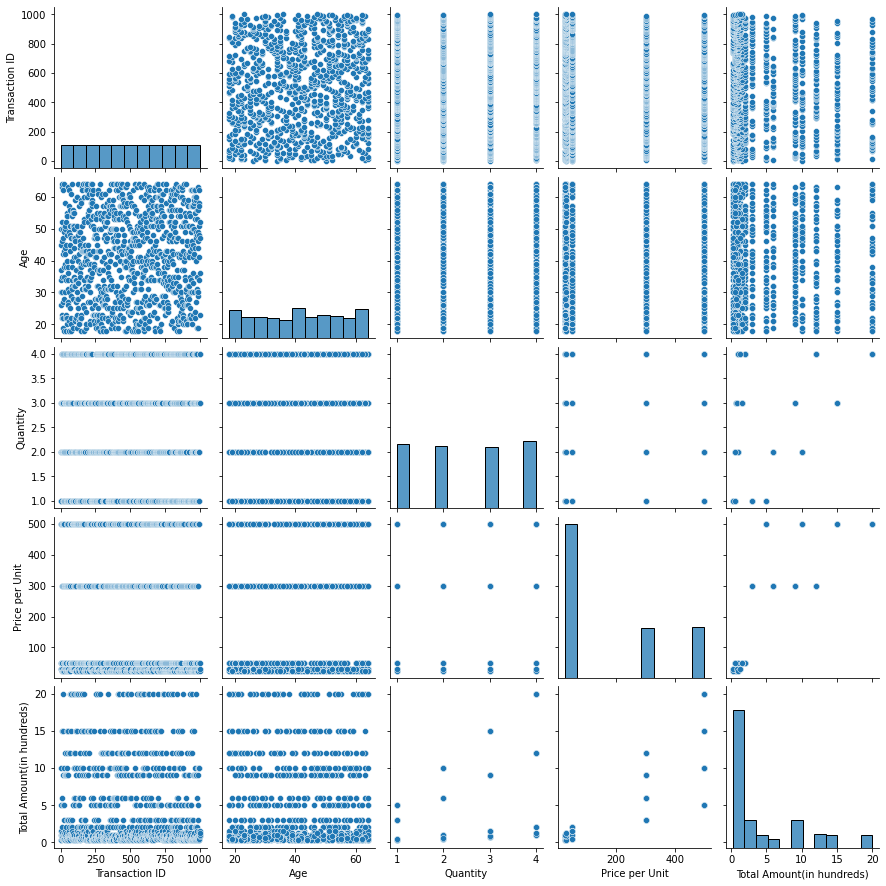

In [16]:
sns.pairplot(df)
#Plots the pairwise relationship of the datas in the dataframe.

In [34]:
# Assuming the dataset has a 'Date' column, convert it to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year, quarter, and month from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.quarter
df['Month'] = df['Date'].dt.month

# Group by year, quarter, and month, and calculate the total amount of transactions
total_amount_by_year = df.groupby('Year')["Total Amount(in hundreds)"].sum()
total_amount_by_quarter = df.groupby(['Year', 'Quarter'])["Total Amount(in hundreds)"].sum()
total_amount_by_month = df.groupby(['Year', 'Month'])["Total Amount(in hundreds)"].sum()

# Print the total amount of transactions changed over years, quarters, and months
print("\nTotal Amount of Transactions Changed Over Years:")
print(total_amount_by_year)

print("\nTotal Amount of Transactions Changed Over Quarters:")
print(total_amount_by_quarter)

print("\nTotal Amount of Transactions Changed Over Months:")
print(total_amount_by_month)


Total Amount of Transactions Changed Over Years:
Year
2023    4544.7
2024      15.3
Name: Total Amount(in hundreds), dtype: float64

Total Amount of Transactions Changed Over Quarters:
Year  Quarter
2023  1          1153.70
      2          1305.10
      3          1102.65
      4           983.25
2024  1            15.30
Name: Total Amount(in hundreds), dtype: float64

Total Amount of Transactions Changed Over Months:
Year  Month
2023  1        471.90
      2        394.30
      3        287.50
      4        297.15
      5        585.90
      6        422.05
      7        425.05
      8        391.55
      9        286.05
      10       371.30
      11       330.20
      12       281.75
2024  1         15.30
Name: Total Amount(in hundreds), dtype: float64


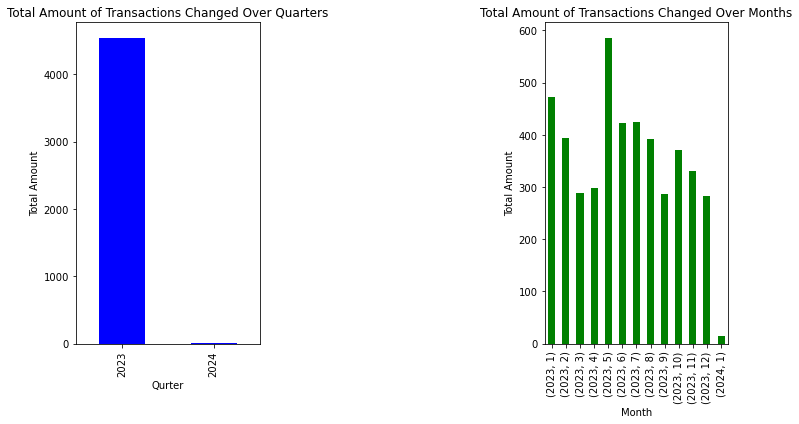

In [35]:
# Plot bar graphs for total amount of transactions changed over years, quarters, and months
plt.figure(figsize=(10,6))

# Bar graph for total amount of transactions changed over years
plt.subplot(1, 3, 1)
total_amount_by_year.plot(kind='bar', color='blue')
plt.title('Total Amount of Transactions Changed Over Quarters')
plt.xlabel('Qurter')
plt.ylabel('Total Amount')

# Bar graph for total amount of transactions changed over months
plt.subplot(1, 3, 3)
total_amount_by_month.plot(kind='bar', color='green')
plt.title('Total Amount of Transactions Changed Over Months')
plt.xlabel('Month')
plt.ylabel('Total Amount')

plt.tight_layout()
plt.show()

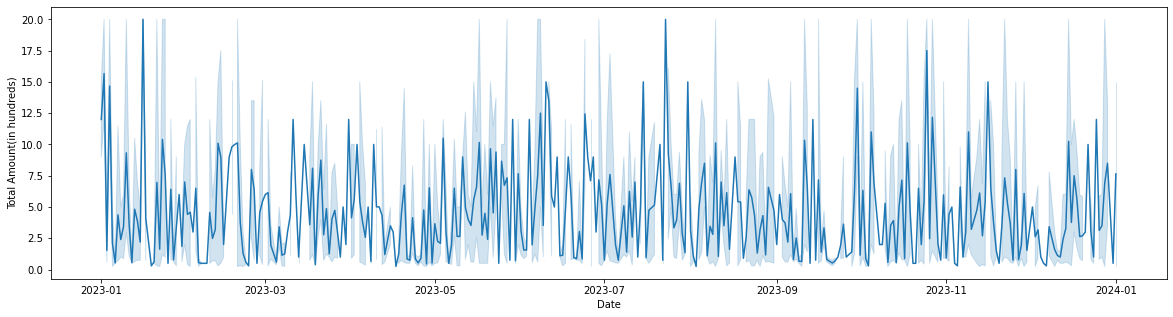

In [36]:
df.index
plt.figure(figsize=(20,5))
sns.lineplot(x='Date',y="Total Amount(in hundreds)",data=df)
plt.show()

###### Customer and Product Analysis

In [17]:
p = df["Product Category"]
product = p.value_counts()
product

Clothing       351
Electronics    342
Beauty         307
Name: Product Category, dtype: int64

<AxesSubplot:xlabel='Product Category', ylabel='count'>

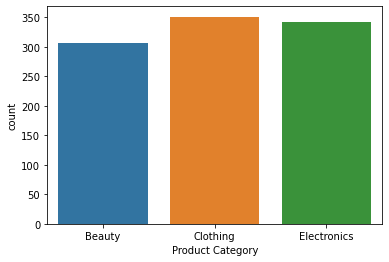

In [18]:
sns.countplot(x = p)

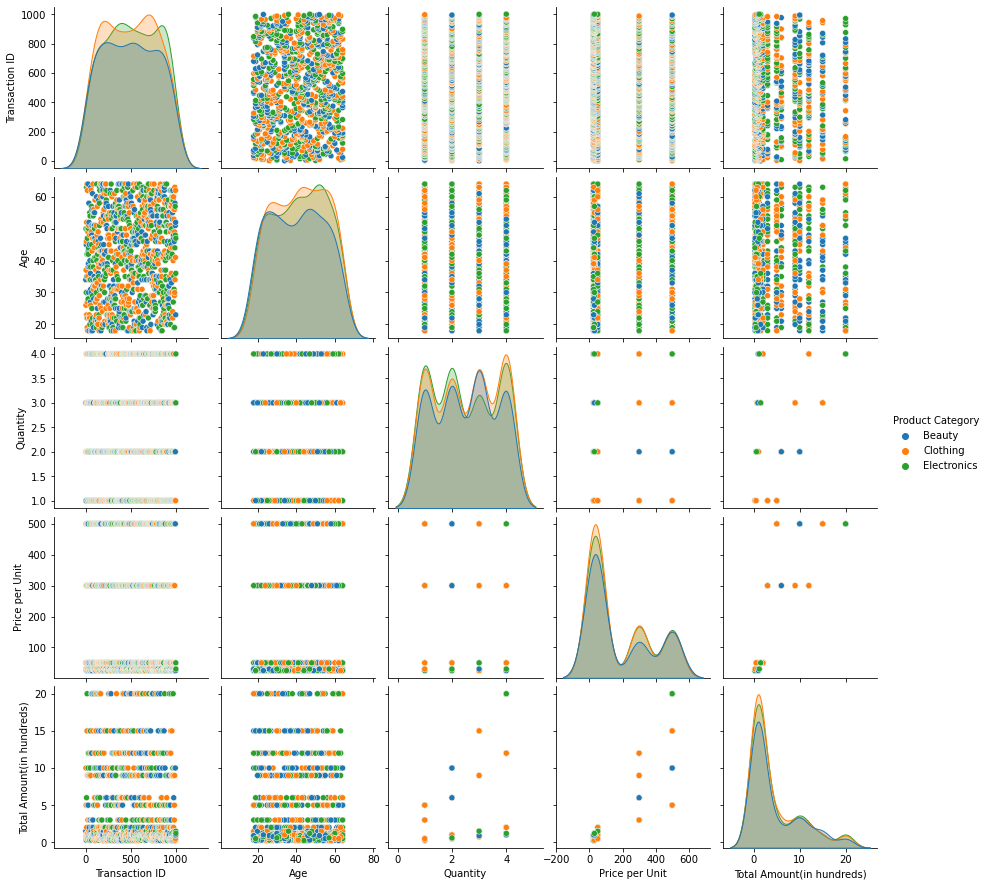

In [19]:
sns.pairplot(df, hue = "Product Category")

In [20]:
cat_amt = df.groupby("Product Category")[["Quantity","Total Amount(in hundreds)"]].sum()
cat_amt

,Quantity,Total Amount(in hundreds)
Product Category,,
Beauty,771,1435.15
Clothing,894,1555.80
Electronics,849,1569.05


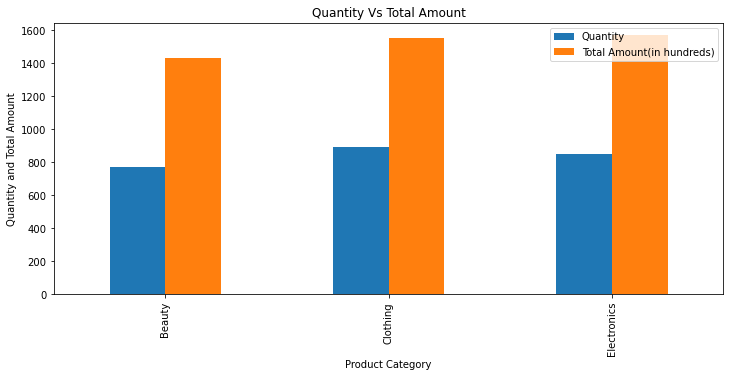

In [21]:
cat_amt.plot(kind = "bar", figsize=(12,5))
plt.title("Quantity Vs Total Amount")
plt.ylabel("Quantity and Total Amount")
plt.show()

In [22]:
gender=df["Gender"].value_counts()
gender
#Male and Female counts

Female    510
Male      490
Name: Gender, dtype: int64

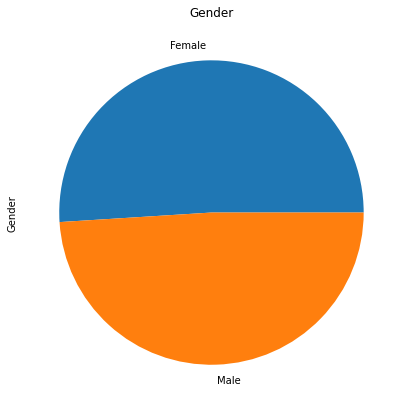

In [23]:
gender.plot(kind = "pie", figsize = (7,7))
plt.title("Gender")
plt.show()

In [24]:
gen_dum = pd.get_dummies(df["Gender"],prefix="Gender")
gen = pd.concat([df,gen_dum],axis=1)
gen
#Separating Gender column into male and female columns 

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount(in hundreds),Gender_Female,Gender_Male
0,1,24-11-2023,CUST001,Male,34,Beauty,3,50,1.5,0,1
1,2,27-02-2023,CUST002,Female,26,Clothing,2,500,10.0,1,0
2,3,13-01-2023,CUST003,Male,50,Electronics,1,30,0.3,0,1
3,4,21-05-2023,CUST004,Male,37,Clothing,1,500,5.0,0,1
4,5,06-05-2023,CUST005,Male,30,Beauty,2,50,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
995,996,16-05-2023,CUST996,Male,62,Clothing,1,50,0.5,0,1
996,997,17-11-2023,CUST997,Male,52,Beauty,3,30,0.9,0,1
997,998,29-10-2023,CUST998,Female,23,Beauty,4,25,1.0,1,0
998,999,05-12-2023,CUST999,Female,36,Electronics,3,50,1.5,1,0


In [25]:
cat_gen = gen.groupby("Product Category")[["Gender_Female","Gender_Male"]].sum()
cat_gen

,Gender_Female,Gender_Male
Product Category,,
Beauty,166,141
Clothing,174,177
Electronics,170,172


In [26]:
df["Price per Unit"].corr(df["Total Amount(in hundreds)"])
#Calculating Pearson correlation coefficient between "Price per Unit" and "Total Amount(in hundreds)" in df.

0.8519248403554026

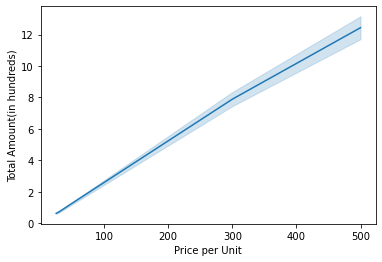

In [27]:
sns.lineplot(x = "Price per Unit", y="Total Amount(in hundreds)", data =df )
plt.show()